# Adaboost回归算法

In [1]:
import numpy as np
from sklearn.ensemble import AdaBoostRegressor
from sklearn import datasets
from sklearn import tree
import graphviz

X,y = datasets.load_boston(return_X_y=True)

In [2]:
X.shape

(506, 13)

In [3]:
ada = AdaBoostRegressor(n_estimators=3,loss = 'linear',# 线性，误差绝对值
                                 learning_rate=1)#learning_rate 学习率

ada.fit(X,y)#训练
y_ = ada.predict(X)#预测
print(y_[:10])

[26.93419355 24.25360825 34.01714286 34.01714286 33.78648649 24.25360825
 20.17631579 19.46315789 18.4037037  19.46315789]


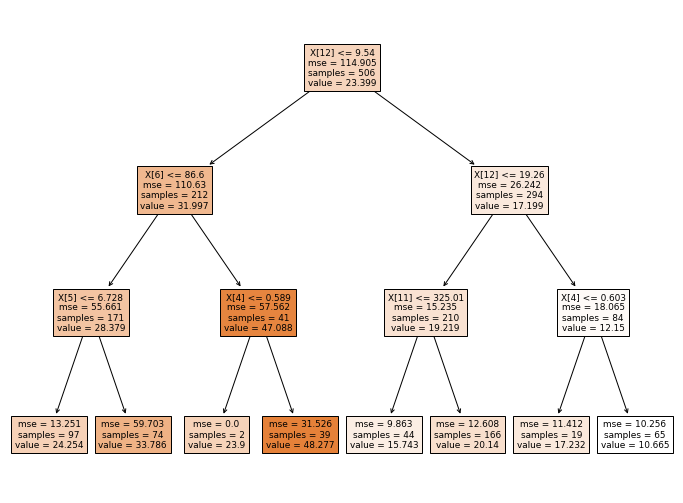

In [4]:
# dot_data = tree.export_graphviz(ada[1],filled=True)
# graph = graphviz.Source(dot_data)
# graph
import matplotlib.pyplot as plt
plt.figure(figsize=(12,9))
_ = tree.plot_tree(ada[1],filled=True)

In [5]:
ada.estimator_errors_

array([0.10461466, 0.13876002, 0.16561975])

In [6]:
ada.estimator_weights_

array([2.14697052, 1.82562725, 1.61699471])

# Adaboost回归算法代码演示

## 构建第一棵树

In [7]:
w1 = np.full(shape = 506,fill_value=1/506) # 初始样本权重
y1_ = ada[0].predict(X) # 第一棵树，弱学习器，进行了预测


# 计算预测值和目标值的误差
error_vector = np.abs(y1_ - y)
error_max = error_vector.max()

if error_max != 0:
    error_vector /= error_max # 归一化0~1
# 上面的代码对应着课件中的a---c数学公式

# 计算算法误差，对着课件中数学公式d
estimator_error = (w1 * error_vector).sum()
print('第一棵树误差：',estimator_error)
print('算法误差：',ada.estimator_errors_)

# 计算算法权重，对应课件中数学公式e
beta = estimator_error / (1. - estimator_error)
estimator_weight =  np.log(1. / beta)
print('第一棵树权重：',estimator_weight)
print('算法权重：', ada.estimator_weights_)


# 根据第一棵树更新权重，对应数学公式f
w2 = w1 * np.power(beta, (1. - error_vector))
w2 /= w2.sum() # 归一化
w2

第一棵树误差： 0.10461465637624083
算法误差： [0.10461466 0.13876002 0.16561975]
第一棵树权重： 2.146970517014196
算法权重： [2.14697052 1.82562725 1.61699471]


array([0.00200515, 0.00152061, 0.00158562, 0.00157772, 0.00177695,
       0.00255577, 0.00164517, 0.00268888, 0.00188544, 0.00157127,
       0.00211295, 0.0018667 , 0.00178425, 0.00166571, 0.00196863,
       0.00173018, 0.00167036, 0.00203472, 0.0016912 , 0.00196863,
       0.00151309, 0.00177005, 0.0017086 , 0.00162013, 0.0017613 ,
       0.00154796, 0.00190028, 0.00165747, 0.00193896, 0.00251826,
       0.00160388, 0.0026074 , 0.00154411, 0.00155588, 0.00150933,
       0.0018667 , 0.00171709, 0.00159151, 0.00188618, 0.00189451,
       0.00160989, 0.00164584, 0.00197413, 0.00188618, 0.00156751,
       0.00181085, 0.00171709, 0.00187118, 0.00221147, 0.00151272,
       0.00175666, 0.0016531 , 0.00192965, 0.00170885, 0.00226299,
       0.0016722 , 0.00188618, 0.00201319, 0.00169592, 0.00177005,
       0.00189528, 0.00232665, 0.00155999, 0.0018585 , 0.00162639,
       0.00172188, 0.00179715, 0.00153648, 0.00209196, 0.00160364,
       0.0018159 , 0.0015091 , 0.00163273, 0.00170885, 0.00180

## 构建第二棵树

In [8]:
y2_ = ada[1].predict(X) # 第一棵树，弱学习器，进行了预测


# 计算预测值和目标值的误差
error_vector = np.abs(y2_ - y)
error_max = error_vector.max()

if error_max != 0:
    error_vector /= error_max # 归一化0~1
# 上面的代码对应着课件中的a---c数学公式

# 计算算法误差，对着课件中数学公式d
estimator_error = (w2 * error_vector).sum()
print('第一棵树误差：',estimator_error)
print('算法误差：',ada.estimator_errors_)

# 计算算法权重，对应课件中数学公式e
beta = estimator_error / (1. - estimator_error)
estimator_weight =  np.log(1. / beta)
print('第一棵树权重：',estimator_weight)
print('算法权重：', ada.estimator_weights_)


# 根据第二棵树更新权重，对应数学公式f
w3 = w2 * np.power(beta, (1. - error_vector))
w3 /= w3.sum() # 归一化

第一棵树误差： 0.13876001677926902
算法误差： [0.10461466 0.13876002 0.16561975]
第一棵树权重： 1.825627248722799
算法权重： [2.14697052 1.82562725 1.61699471]


## 构建第三棵树

In [9]:
y3_ = ada[2].predict(X) # 第一棵树，弱学习器，进行了预测


# 计算预测值和目标值的误差
error_vector = np.abs(y3_ - y)
error_max = error_vector.max()

if error_max != 0:
    error_vector /= error_max # 归一化0~1
# 上面的代码对应着课件中的a---c数学公式

# 计算算法误差，对着课件中数学公式d
estimator_error = (w3 * error_vector).sum()
print('第一棵树误差：',estimator_error)
print('算法误差：',ada.estimator_errors_)

# 计算算法权重，对应课件中数学公式e
beta = estimator_error / (1. - estimator_error)
estimator_weight =  np.log(1. / beta)
print('第一棵树权重：',estimator_weight)
print('算法权重：', ada.estimator_weights_)


# 根据第三棵树更新权重，对应数学公式f
w4 = w3 * np.power(beta, (1. - error_vector))
w4 /= w4.sum() # 归一化

第一棵树误差： 0.1656197533574877
算法误差： [0.10461466 0.13876002 0.16561975]
第一棵树权重： 1.6169947112825709
算法权重： [2.14697052 1.82562725 1.61699471]


In [10]:
ada.predict(X)[:10]

array([26.93419355, 24.25360825, 34.01714286, 34.01714286, 33.78648649,
       24.25360825, 20.17631579, 19.46315789, 18.4037037 , 19.46315789])

In [11]:
ada[0].predict(X)[:10]

array([27.77368421, 21.73165829, 34.01714286, 34.01714286, 34.01714286,
       21.73165829, 21.73165829, 19.46315789, 19.46315789, 19.46315789])

In [12]:
ada[1].predict(X)[:10]

array([24.25360825, 24.25360825, 33.78648649, 33.78648649, 33.78648649,
       24.25360825, 20.14036145, 20.14036145, 17.23157895, 20.14036145])

In [13]:
ada[2].predict(X)[:10]

array([26.93419355, 26.93419355, 46.73142857, 46.73142857, 26.93419355,
       26.93419355, 20.17631579, 18.4037037 , 18.4037037 , 18.4037037 ])

# XGBoost使用方式一

In [14]:
# 导包加载数据
import numpy as np
import xgboost as xgb
from xgboost import XGBClassifier # 分类
from sklearn import datasets
from sklearn import tree
from sklearn.model_selection import train_test_split
X,y = datasets.load_wine(return_X_y=True) # 葡萄酒品质类别
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2)


# 模型创建
model = XGBClassifier(learning_rate =0.1,# 学习率，控制每次迭代更新权重时的步长，默认0.3。值越小，训练越慢。
                      use_label_encoder=False,
                      n_estimators=5,# 总共迭代的次数，即决策树的个数
                      max_depth=5, # 深度
                      min_child_weight=1,# 默认值为1,。值越大，越容易欠拟合；值越小，越容易过拟合
                      gamma=0,# 惩罚项系数，指定节点分裂所需的最小损失函数下降值。
                      subsample=0.8,# 训练每棵树时，使用的数据占全部训练集的比例。默认值为1，典型值为0.5-1。防止overfitting。
                      colsample_bytree=0.8,
                      objective= 'binary:logistic',# 目标函数
                      eval_metric = ['merror'],# 验证数据集评判标准
                      nthread=4,)# 并行线程数
# 数据
eval_set = [(X_test, y_test),(X_train,y_train)]

model.fit(X_train,y_train,eval_set = eval_set,verbose = True)

model.score(X_test,y_test)

[0]	validation_0-merror:0.13889	validation_1-merror:0.00704
[1]	validation_0-merror:0.05556	validation_1-merror:0.00000
[2]	validation_0-merror:0.05556	validation_1-merror:0.00000
[3]	validation_0-merror:0.02778	validation_1-merror:0.00000
[4]	validation_0-merror:0.08333	validation_1-merror:0.00000


0.9166666666666666

# XGBoost方式二

In [15]:
X,y = datasets.load_wine(return_X_y=True)
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2)

param = {'learning_rate':0.1,'use_label_encoder':False,'n_estimators':10,
         'max_depth':5,'min_child_weight':1,'gamma':0,'subsample':0.8,
         'colsample_bytree':0.8, 'verbosity':0,'objective':'multi:softprob'}

model = xgb.XGBClassifier(**param) # **字典，遍历取出字典中的参数

model.fit(X_train, y_train, early_stopping_rounds=20, eval_metric='merror',
        eval_set=[(X_test, y_test)])

[0]	validation_0-merror:0.05556
[1]	validation_0-merror:0.05556
[2]	validation_0-merror:0.02778
[3]	validation_0-merror:0.02778
[4]	validation_0-merror:0.00000
[5]	validation_0-merror:0.02778
[6]	validation_0-merror:0.05556
[7]	validation_0-merror:0.00000
[8]	validation_0-merror:0.02778
[9]	validation_0-merror:0.02778


/opt/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=0.8,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
              importance_type=None, interaction_constraints='',
              learning_rate=0.1, max_bin=256, max_cat_to_onehot=4,
              max_delta_step=0, max_depth=5, max_leaves=0, min_child_weight=1,
              missing=nan, monotone_constraints='()', n_estimators=10, n_jobs=0,
              num_parallel_tree=1, objective='multi:softprob', predictor='auto',
              random_state=0, reg_alpha=0, ...)

# XGBoost使用方式三

In [16]:
import xgboost as xgb
from sklearn.metrics import accuracy_score
X,y = datasets.load_wine(return_X_y=True)
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2)


# 创建数据
dtrain = xgb.DMatrix(data = X_train,label = y_train)
dtest = xgb.DMatrix(data = X_test,label = y_test)

# 指定参数
param = {'learning_rate':0.1,'use_label_encoder':False,'n_estimators':20,
         'max_depth':5,'min_child_weight':1,'gamma':0,'subsample':0.8,'eval_metric':['merror'],
         'colsample_bytree':0.8, 'verbosity':0,'objective':'multi:softmax','num_class':3 }

num_round = 5
evals = [(dtest,'测试')]

bst = xgb.train(param, dtrain, num_round,evals = evals,)

# 进行预测
y_ = bst.predict(dtest)
display(y_,accuracy_score(y_test,y_))

[0]	测试-merror:0.05556
[1]	测试-merror:0.00000
[2]	测试-merror:0.00000
[3]	测试-merror:0.00000
[4]	测试-merror:0.00000


array([0., 1., 0., 2., 0., 1., 2., 2., 2., 2., 1., 0., 0., 1., 2., 2., 0.,
       0., 0., 1., 1., 0., 1., 2., 1., 1., 0., 1., 2., 1., 0., 1., 0., 1.,
       0., 1.], dtype=float32)

1.0

# XGBoost算法实战

In [36]:
import pandas as pd
import numpy as np
import xgboost as xgb
from xgboost import XGBClassifier
from sklearn import model_selection, metrics
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import auc

import matplotlib.pylab as plt
from matplotlib.pylab import rcParams
rcParams['figure.figsize'] = 12, 4

## 加载数据

In [18]:
train = pd.read_csv('train_modified.csv')
test = pd.read_csv('test_modified.csv')

display(train.head(5))

# 删除ID字段，对建模没有实际意义
train.drop(labels = 'ID',axis = 1,inplace = True)
test.drop(labels = 'ID',axis = 1,inplace = True)

# 声明训练数据字段和目标值字段
target = 'Disbursed' # ----> y
cols = [x for x in train.columns if x not in [target]] # 训练字段、属性---->X

,Disbursed,Existing_EMI,ID,Loan_Amount_Applied,Loan_Tenure_Applied,Monthly_Income,Var4,Var5,Age,EMI_Loan_Submitted_Missing,...,Var2_2,Var2_3,Var2_4,Var2_5,Var2_6,Mobile_Verified_0,Mobile_Verified_1,Source_0,Source_1,Source_2
0,0.0,0.0,ID000002C20,300000.0,5.0,20000,1,0,37,1,...,0,0,0,0,1,1,0,1,0,0
1,0.0,0.0,ID000004E40,200000.0,2.0,35000,3,13,30,0,...,0,0,0,0,1,0,1,1,0,0
2,0.0,0.0,ID000007H20,600000.0,4.0,22500,1,0,34,1,...,0,0,0,0,0,0,1,0,0,1
3,0.0,0.0,ID000008I30,1000000.0,5.0,35000,3,10,28,1,...,0,0,0,0,0,0,1,0,0,1
4,0.0,25000.0,ID000009J40,500000.0,2.0,100000,3,17,31,1,...,0,0,0,0,0,0,1,0,0,1


In [19]:
display(target,cols)

'Disbursed'

['Existing_EMI',
 'Loan_Amount_Applied',
 'Loan_Tenure_Applied',
 'Monthly_Income',
 'Var4',
 'Var5',
 'Age',
 'EMI_Loan_Submitted_Missing',
 'Interest_Rate_Missing',
 'Loan_Amount_Submitted_Missing',
 'Loan_Tenure_Submitted_Missing',
 'Processing_Fee_Missing',
 'Device_Type_0',
 'Device_Type_1',
 'Filled_Form_0',
 'Filled_Form_1',
 'Gender_0',
 'Gender_1',
 'Var1_0',
 'Var1_1',
 'Var1_2',
 'Var1_3',
 'Var1_4',
 'Var1_5',
 'Var1_6',
 'Var1_7',
 'Var1_8',
 'Var1_9',
 'Var1_10',
 'Var1_11',
 'Var1_12',
 'Var1_13',
 'Var1_14',
 'Var1_15',
 'Var1_16',
 'Var1_17',
 'Var1_18',
 'Var2_0',
 'Var2_1',
 'Var2_2',
 'Var2_3',
 'Var2_4',
 'Var2_5',
 'Var2_6',
 'Mobile_Verified_0',
 'Mobile_Verified_1',
 'Source_0',
 'Source_1',
 'Source_2']

## 声明方法（多次调用，封装）

In [32]:
def mfit(model, dtrain, dtest, cols,useTrainCV=True, cv_folds=5, early_stopping_rounds=50):
    # 训练数据交叉验证
    if useTrainCV:
        xgb_param = model.get_xgb_params()
        xgb_train = xgb.DMatrix(dtrain[cols].values, label=dtrain[target].values)
        xgb_test = xgb.DMatrix(dtest[cols].values)
        cvresult = xgb.cv(xgb_param, xgb_train, num_boost_round = model.get_params()['n_estimators'], 
                          nfold=cv_folds,early_stopping_rounds = early_stopping_rounds, # 模型数量合适，提前终止
                          verbose_eval=False)
        print(cvresult.shape)
        print(cvresult)
        model.set_params(n_estimators=cvresult.shape[0]) # 重新设置参数，设置多少棵树
    
    # 建模
    model.fit(dtrain[cols], dtrain['Disbursed'],eval_metric='auc')
        
    # 对训练集预测
    y_ = model.predict(dtrain[cols])
    proba_ = model.predict_proba(dtrain[cols])[:,1] # 获取正样本
        
    # 输出模型的一些结果
    print('该模型表现：')
    print('准确率 (训练集): %.4g' % metrics.accuracy_score(dtrain['Disbursed'],y_))
    print('AUC 得分 (训练集): %f' % metrics.roc_auc_score(dtrain['Disbursed'],proba_))
    # 特征重要性
    feature_imp = pd.Series(model.get_booster().get_fscore()).sort_values(ascending=False)
    feature_imp.plot(kind='bar', title='Feature Importances')
    plt.ylabel('Feature Importance Score')

## 寻找最合适的n_estimators = 124

(115, 4)
     train-logloss-mean  train-logloss-std  test-logloss-mean  \
0              0.603528           0.000100           0.603551   
1              0.530141           0.000146           0.530192   
2              0.469050           0.000228           0.469126   
3              0.417523           0.000267           0.417629   
4              0.373635           0.000334           0.373780   
..                  ...                ...                ...   
110            0.057116           0.000826           0.063621   
111            0.057020           0.000828           0.063594   
112            0.056963           0.000829           0.063591   
113            0.056906           0.000782           0.063583   
114            0.056828           0.000755           0.063578   

     test-logloss-std  
0            0.000126  
1            0.000247  
2            0.000334  
3            0.000459  
4            0.000542  
..                ...  
110          0.003347  
111          0.003

/opt/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(


该模型表现：
准确率 (训练集): 0.9854
AUC 得分 (训练集): 0.894665
CPU times: user 2min 17s, sys: 1.89 s, total: 2min 19s
Wall time: 34.5 s


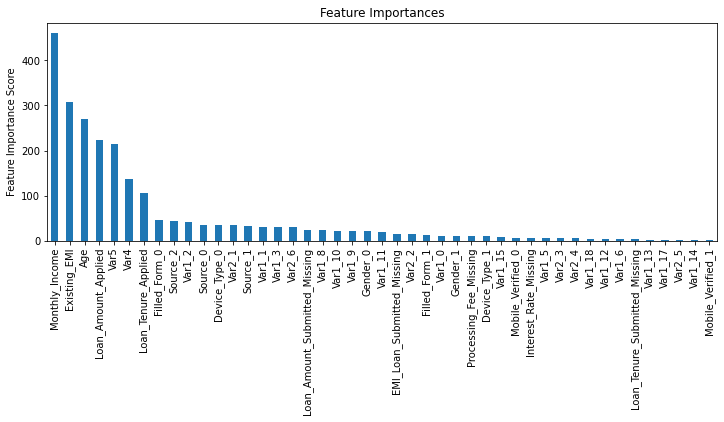

In [43]:
%%time
xgb1 = XGBClassifier(learning_rate =0.1,
                     use_label_encoder=1,
                     n_estimators=500,
                     max_depth=5,
                     min_child_weight=1,
                     gamma=0,
                     subsample=0.8,
                     colsample_bytree=0.8,
                     objective= 'binary:logistic',
                     nthread=4,
                     scale_pos_weight=1,
                     reg_alpha = 0,
                     verbosity = 0)

mfit(xgb1, train, test, cols)

## 超参数筛选（一）

In [25]:
%%time
# 对于max_depth和min_child_weight查找最好的参数
param_grid = { 'max_depth':range(3,10,2),'min_child_weight':range(1,6,2)}

model = XGBClassifier(learning_rate =0.1,n_estimators=116,max_depth=5,use_label_encoder=False,
                      min_child_weight=1,gamma=0,subsample=0.8,colsample_bytree=0.8,
                      objective= 'binary:logistic',nthread=4,scale_pos_weight=1,seed=27,
                      verbosity = 0)
# 网格搜索验证：寻找最优的参数
gsearch1 = GridSearchCV(estimator = model,param_grid = param_grid, 
                        scoring='roc_auc',n_jobs=-1, cv=5)

gsearch1.fit(train[cols],train[target])

print('本次筛选最佳参数：',gsearch1.best_params_)
print('最佳得分是：',gsearch1.best_score_)

本次筛选最佳参数： {'max_depth': 5, 'min_child_weight': 3}
最佳得分是： 0.8413475736737352
CPU times: user 18.6 s, sys: 656 ms, total: 19.3 s
Wall time: 2min 51s


## 超参数筛选（二）

In [26]:
%%time
# 筛选合适的gamma：惩罚项系数，指定节点分裂所需的最小损失函数下降值
param_grid = {'gamma':[i/10.0 for i in range(0,5)]}

model = XGBClassifier(learning_rate =0.1,n_estimators=116,max_depth=5,use_label_encoder=False,
                      min_child_weight=3,gamma=0,subsample=0.8,colsample_bytree=0.8,
                      objective= 'binary:logistic',nthread=4,scale_pos_weight=1,seed=27,
                      verbosity = 0)
gsearch2 = GridSearchCV(estimator = model,param_grid = param_grid,
                        scoring='roc_auc',n_jobs=4, cv=5)
gsearch2.fit(train[cols],train[target])

print('本次筛选最佳参数：',gsearch2.best_params_)
print('最佳得分是：',gsearch2.best_score_)

本次筛选最佳参数： {'gamma': 0.1}
最佳得分是： 0.8418766916751613
CPU times: user 18.9 s, sys: 529 ms, total: 19.4 s
Wall time: 58.8 s


## 超参数筛选（三）

In [28]:
%%time
# 对subsample 和 colsample_bytree用grid search寻找最合适的参数
param_grid = {'subsample':[i/10.0 for i in range(6,10)],
              'colsample_bytree':[i/10.0 for i in range(6,10)]}

model = XGBClassifier(learning_rate =0.1,n_estimators=116,max_depth=5,use_label_encoder=False,
                      min_child_weight=3,gamma=0.1,subsample=0.8,colsample_bytree=0.8,
                      objective= 'binary:logistic',nthread=4,scale_pos_weight=1,seed=1024,
                      verbosity = 0)

gsearch3 = GridSearchCV(estimator = model,param_grid = param_grid,
                        scoring='roc_auc',n_jobs=-1,cv=5)

gsearch3.fit(train[cols],train[target])

print('本次筛选最佳参数：',gsearch3.best_params_)
print('最佳得分是：',gsearch3.best_score_)

本次筛选最佳参数： {'colsample_bytree': 0.9, 'subsample': 0.8}
最佳得分是： 0.842691084642228
CPU times: user 20.2 s, sys: 465 ms, total: 20.7 s
Wall time: 3min 5s


## 超参数筛选（四）

In [29]:
%%time
# 对reg_alpha用grid search寻找最合适的参数
param_grid = {'reg_alpha':[1e-5, 1e-2, 0.1, 1, 100]}

model = XGBClassifier(learning_rate =0.1,n_estimators=116,max_depth=5,use_label_encoder=False,
                      min_child_weight=3,gamma=0.1,subsample=0.9,colsample_bytree=0.8,
                      objective= 'binary:logistic',nthread=4,scale_pos_weight=1,seed=1024,
                      verbosity = 0)

gsearch4 = GridSearchCV(estimator = model,param_grid = param_grid,
                        scoring='roc_auc',n_jobs=-1,cv=5)

gsearch4.fit(train[cols],train[target])

print('本次筛选最佳参数：',gsearch4.best_params_)
print('最佳得分是：',gsearch4.best_score_)

本次筛选最佳参数： {'reg_alpha': 1}
最佳得分是： 0.8423047785333679
CPU times: user 18.3 s, sys: 441 ms, total: 18.7 s
Wall time: 56.9 s


## 结论：

n_estimators = 116

树深度 == 5

min_child_weight = 3

gamma = 0.1

subsample = 0.9

colsample_bytree = 0.8

reg_alpha = 1

# 验证

/opt/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(


该模型表现：
准确率 (训练集): 0.9854
AUC 得分 (训练集): 0.684927
CPU times: user 2.58 s, sys: 444 ms, total: 3.03 s
Wall time: 516 ms


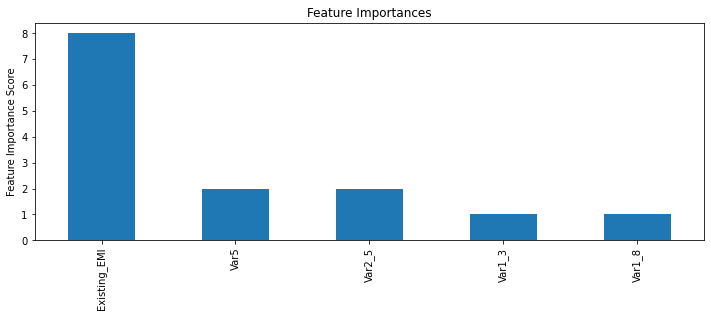

In [44]:
%%time
xgb2 = XGBClassifier(learning_rate =0.1,
                     use_label_encoder=False,
                     n_estimators=20,
                     max_depth=3,
                     min_child_weight=1,
                     gamma=0,
                     subsample=0.8,
                     colsample_bytree=0.8,
                     reg_alpha = 100,
                     objective= 'binary:logistic',
                     nthread=4,
                     scale_pos_weight=1,                  
                     verbosity = 0)
mfit(xgb2, train, test, cols,False)

/opt/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(


该模型表现：
准确率 (训练集): 0.9854
AUC 得分 (训练集): 0.885823
CPU times: user 18.5 s, sys: 644 ms, total: 19.2 s
Wall time: 4.47 s


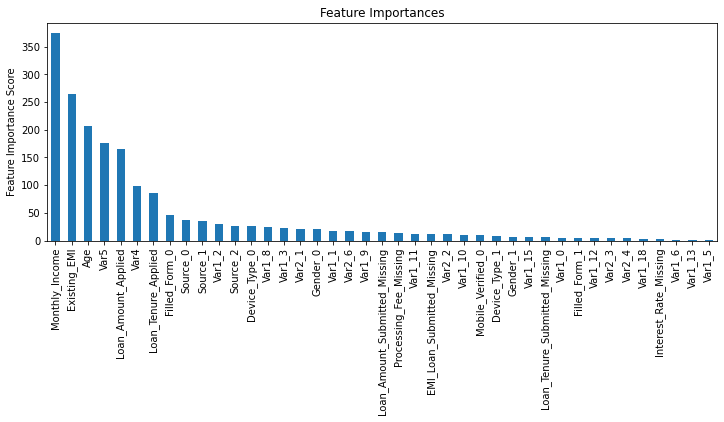

In [46]:
%%time
xgb2 = XGBClassifier(learning_rate =0.1,
                     use_label_encoder=False,
                     n_estimators=116,
                     max_depth=5,
                     min_child_weight=3,
                     gamma=0.1,
                     subsample=0.9,
                     colsample_bytree=0.8,
                     reg_alpha = 1,
                     objective= 'binary:logistic',
                     nthread=4,
                     scale_pos_weight=1,
                  
                     verbosity = 0)
modelfit(xgb2, train, test, cols,False)

/opt/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(


该模型表现：
准确率 (训练集): 0.9864
AUC 得分 (训练集): 0.950293
CPU times: user 19.1 s, sys: 608 ms, total: 19.7 s
Wall time: 4.62 s


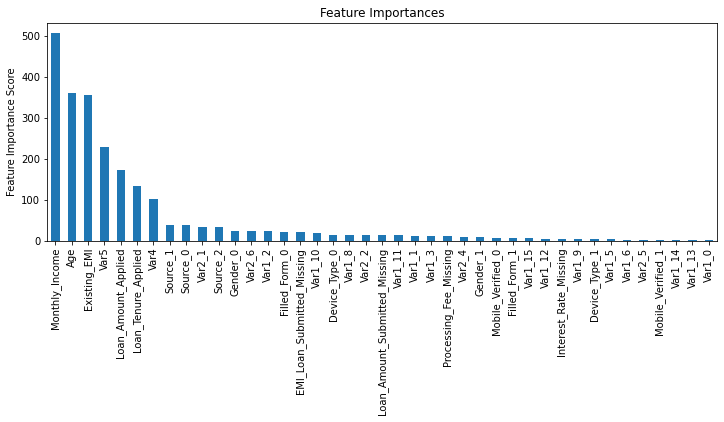

In [48]:
%%time
xgb2 = XGBClassifier(learning_rate =0.5,
                     use_label_encoder=False,
                     n_estimators=116,
                     max_depth=5,
                     min_child_weight=3,
                     gamma=0.1,
                     subsample=0.9,
                     colsample_bytree=0.8,
                     reg_alpha = 1,
                     objective= 'binary:logistic',
                     nthread=4,
                     scale_pos_weight=1,
                  
                     verbosity = 0)
modelfit(xgb2, train, test, cols,False)